# Workshop # 8 - Ensemble

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [4]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [5]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [6]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [7]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df3[['Pclass','Sex_male','Sex_female','Age','SibSp','Parch']], 
                                                    df3['Survived'], 
                                                    train_size=0.7,
                                                    stratify=df3['Survived'].values,
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass  Sex_male  Sex_female        Age  SibSp  Parch
199       2         0           1  24.000000      0      0
468       3         1           0  29.699118      0      0
198       3         0           1  29.699118      0      0
574       3         1           0  16.000000      0      0
776       3         1           0  29.699118      0      0
..      ...       ...         ...        ...    ...    ...
737       1         1           0  35.000000      0      0
360       3         1           0  40.000000      1      4
669       1         0           1  29.699118      1      0
245       1         1           0  44.000000      2      0
768       3         1           0  29.699118      1      0

[623 rows x 6 columns]


In [9]:
print('Training : ', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Testing : ', np.bincount(test_y) / float(len(test_y)) * 100.0)

Training :  [61.63723917 38.36276083]
Testing :  [61.56716418 38.43283582]


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=50000, oob_score=True, max_depth=5,
                             criterion='entropy', random_state=1234,
                             verbose=True, n_jobs=-1)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train_X, train_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 11226 tasks 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50000,
                       n_jobs=-1, oob_score=True, random_state=1234,
                       verbose=True, warm_start=False)

In [11]:
clf.score(train_X, train_y)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 4026 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 4976 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 6026 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 8426 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 9776 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 11226 tasks 

0.8443017656500803

In [14]:
clf.oob_score_

0.8218298555377207

In [15]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [16]:
from sklearn.metrics import accuracy_score
print("Predicting Titanic on the train set using Random Forest")

y_train_pred = clf.predict(train_X)

print("Accurary : ", round(accuracy_score(train_y, y_train_pred),4))
print(classification_report(train_y, y_train_pred))
print(confusion_matrix(train_y, y_train_pred))


Predicting Titanic on the train set using Random Forest


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 4026 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 4976 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 6026 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 8426 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 9776 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 11226 tasks 

Accurary :  0.8443
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       384
           1       0.83      0.74      0.79       239

    accuracy                           0.84       623
   macro avg       0.84      0.83      0.83       623
weighted avg       0.84      0.84      0.84       623

[[348  36]
 [ 61 178]]


[Parallel(n_jobs=12)]: Done 50000 out of 50000 | elapsed:   11.4s finished


In [17]:
print("Predicting Titanic on the test set using Random Forest")

y_pred = clf.predict(test_X)

print("Accurary : ", round(accuracy_score(test_y, y_pred),4))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting Titanic on the test set using Random Forest


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 4026 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 4976 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 6026 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 8426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 9776 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 11226 tasks 

Accurary :  0.8209
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       165
           1       0.82      0.68      0.74       103

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

[[150  15]
 [ 33  70]]


[Parallel(n_jobs=12)]: Done 50000 out of 50000 | elapsed:   10.2s finished


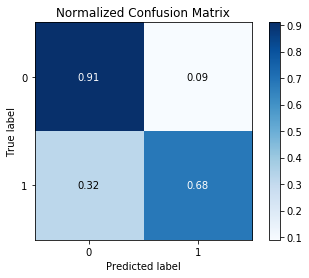

In [18]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize=True)
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(test_y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.794


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=1234)

ada_clf.fit(train_X, train_y)
scores = cross_val_score(ada_clf, train_X, train_y)
scores.mean()  

C:\Users\iphon\Anaconda3\envs\softwarepark\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7752849002849004

In [21]:
print("Predicting Titanic on the train set using Adaboost")

y_train_pred = ada_clf.predict(train_X)

print("Accurary : ", round(accuracy_score(train_y, y_train_pred),4))
print(classification_report(train_y, y_train_pred))
print(confusion_matrix(train_y, y_train_pred))


Predicting Titanic on the train set using Adaboost
Accurary :  0.8459
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       384
           1       0.82      0.76      0.79       239

    accuracy                           0.85       623
   macro avg       0.84      0.83      0.83       623
weighted avg       0.84      0.85      0.84       623

[[345  39]
 [ 57 182]]


In [22]:
print("Predicting Titanic on the test set using Adaboost")

y_pred = ada_clf.predict(test_X)

print("Accurary : ", round(accuracy_score(test_y, y_pred),4))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting Titanic on the test set using Adaboost
Accurary :  0.8134
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.80      0.68      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[148  17]
 [ 33  70]]


In [23]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(test_y, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.788
